In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
Univ = pd.read_csv("C:/Users/Admin/Downloads/Universities.csv")
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [3]:
Univ1=Univ.drop('Univ',axis=1)

In [4]:
Univ1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [5]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ1.iloc[:,1:])

In [7]:
scaled_Univ_df

array([[ 0.6575195 , -0.88986682,  0.07026045, -0.33141256,  0.82030265],
       [ 1.23521235, -0.73465749, -1.68625071,  2.56038138, -0.64452351],
       [-0.76045386,  1.02438157, -0.93346022, -0.16712136, -1.65863393],
       [-0.02520842, -0.78639393, -0.18066972,  0.29164871,  0.14422904],
       [ 0.34241431, -0.32076595,  0.07026045, -0.39084607,  0.36958691],
       [ 0.6575195 , -0.83813038, -0.68253005,  0.33778044,  0.93298158],
       [ 0.71003703, -0.47597528, -0.18066972,  0.29695528,  0.93298158],
       [-0.13024348, -0.78639393, -0.18066972, -0.51381683,  0.59494478],
       [ 0.76255456, -1.30375836, -0.43159988,  0.85874344,  1.15833946],
       [-0.07772595,  0.24833493, -1.43532055,  2.21481798,  0.0315501 ],
       [ 0.92010716, -0.47597528, -0.68253005,  0.52938275,  0.48226584],
       [ 0.44744937, -0.01034729, -0.43159988,  0.04698077,  0.25690797],
       [ 0.23737924,  0.14486204,  0.07026045, -0.86787073,  0.82030265],
       [-2.02087462,  0.76569936,  1.3

In [ ]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


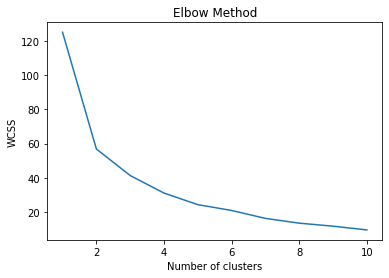

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
wcss

[125.00000000000001,
 56.81771725924309,
 41.30079381252558,
 31.071253607956187,
 24.30106041794524,
 20.90379478538353,
 16.272233123265746,
 13.486553949955045,
 11.722018357484018,
 9.541867117920988]

In [10]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=3, random_state=42)

In [11]:
clusters_new.labels_

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0])

In [12]:
#Assign clusters to the data set
Univ1['clusterid_new'] = clusters_new.labels_

In [13]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.47834204, -0.4942352 , -0.19543032,  0.06879803,  0.5419194 ],
       [-1.54821683,  1.48138682,  1.07398111, -0.99079432, -1.43327606],
       [ 0.5787432 , -0.24316128, -1.56078563,  2.38759968, -0.3064867 ]])

In [14]:
Univ1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1309.117647,85.588235,29.647059,11.941176,28360.352941,91.529412
1,1,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
2,2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [15]:
Univ1

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,1310,89,22,13,22704,94,0
1,1415,100,25,6,63575,81,2
2,1260,62,59,9,25026,72,1
3,1310,76,24,12,31510,88,0
4,1280,83,33,13,21864,90,0
5,1340,89,23,10,32162,95,0
6,1315,90,30,12,31585,95,0
7,1255,74,24,12,20126,92,0
8,1400,91,14,11,39525,97,0
9,1305,75,44,7,58691,87,2
